In [1]:
import numpy as np
from block_chain import BlockChain
from utils import draw_plt, draw_hist

rd 20
rd 50
rd 100


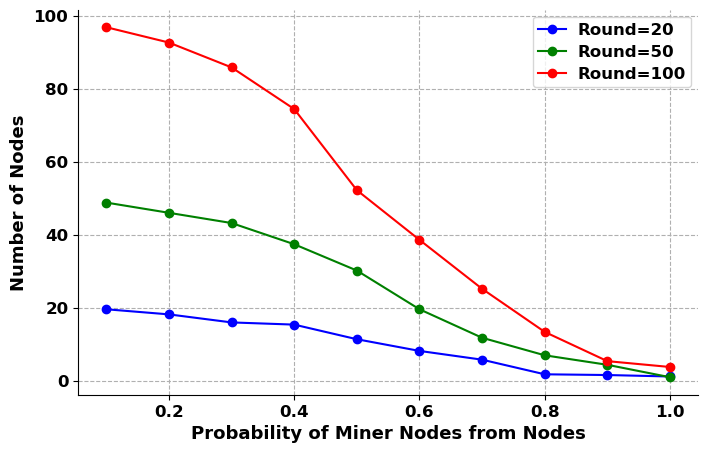

In [2]:
def draw1():
    params = {
        'message_pool_size': 100,
        'n': 30,
        'rd': [20, 50, 100],
        'p_n': np.arange(0.1, 1.01, 0.1),
        'strategy': 1,
        'w': 5,
    }
    res = dict()
    for rd in params['rd']:
        res[rd] = dict()
    
    for rd in params['rd']:
        print('rd %d' % rd)
        for p_n in params['p_n']:
            p_n = round(p_n, 2)
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=params['message_pool_size'], 
                                n=params['n'], 
                                p_n=p_n, 
                                rd=rd, 
                                strategy=params['strategy'], 
                                w=params['w'], 
                                verbose=False)
                tmp.append(bc.start()['bc_size'])
            res[rd][p_n] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'Round={k}') for k in [20, 50, 100]], xlabel='Probability of Miner Nodes from Nodes', ylabel='Number of Nodes', mode='show', save_name='Block Chain p_n & bc_size')

draw1()

rd 20
rd 50
rd 100


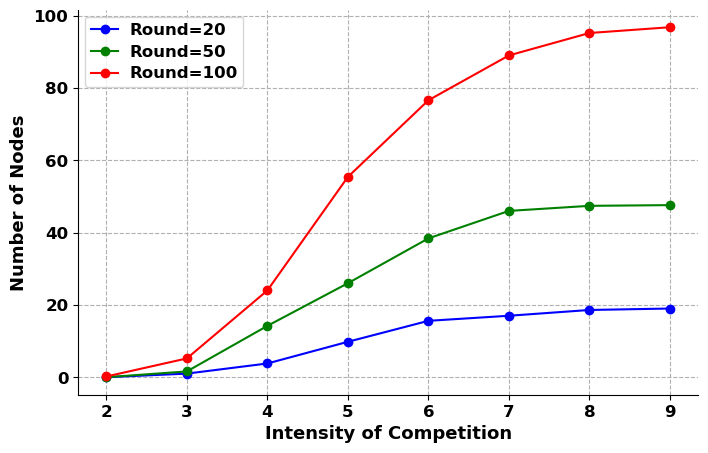

In [3]:
def draw2():
    params = {
        'message_pool_size': 100,
        'n': 30,
        'rd': [20, 50, 100],
        'p_n': 0.5,
        'strategy': 1,
        'w': np.arange(2, 10),
    }
    res = dict()
    for rd in params['rd']:
        res[rd] = dict()
    
    for rd in params['rd']:
        print('rd %d' % rd)
        for w in params['w']:
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=params['message_pool_size'], 
                                n=params['n'], 
                                p_n=params['p_n'], 
                                rd=rd, 
                                strategy=params['strategy'], 
                                w=w, 
                                verbose=False)
                tmp.append(bc.start()['bc_size'])
            res[rd][w] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'Round={k}') for k in [20, 50, 100]], xlabel='Intensity of Competition', ylabel='Number of Nodes', mode='show', save_name='Block Chain w & bc_size')

draw2()

Round 20
Round 50
Round 100


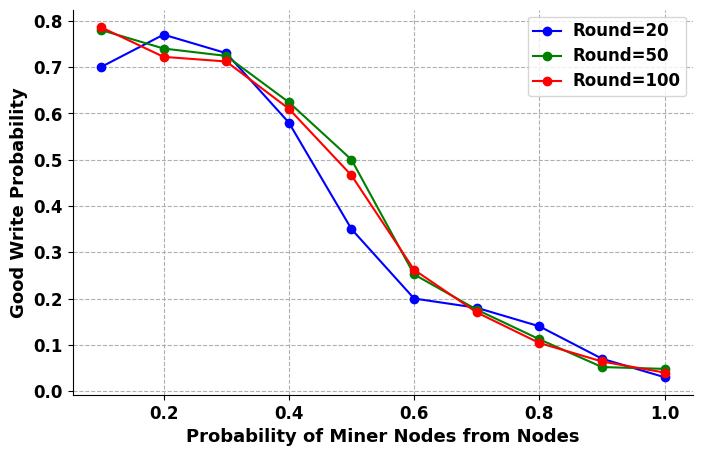

In [8]:
def draw_extra1_1():
    """全节点转共识节点概率对上链比例的影响."""
    MESSAGE_POOL_SIZE = 100
    NODES = 30
    ROUND = [20, 50, 100]
    P_N = np.arange(0.1, 1.01, 0.1)
    STRATEGY = 1
    W = 5
    P_WRITE_WRONG = 0.2
    P_VOTE_WRONG = 0.2

    res = {rd: dict() for rd in ROUND}
    
    for rd in ROUND:
        print(f'Round {rd}')
        for pn in P_N:
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=MESSAGE_POOL_SIZE, 
                                n=NODES, 
                                p_n=pn, 
                                rd=rd, 
                                strategy=STRATEGY, 
                                w=W, 
                                p_write_wrong=P_WRITE_WRONG,
                                p_vote_wrong=P_VOTE_WRONG,
                                verbose=False)
                write_stat = bc.start()
                tmp.append(write_stat['bc_good_prob'])
            res[rd][pn] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'Round={k}') for k in ROUND], xlabel='Probability of Miner Nodes from Nodes', ylabel='Good Write Probability', mode='show', save_name='Block Chain p_n & goodwriterate')

draw_extra1_1()

Nodes 10
Nodes 30
Nodes 50


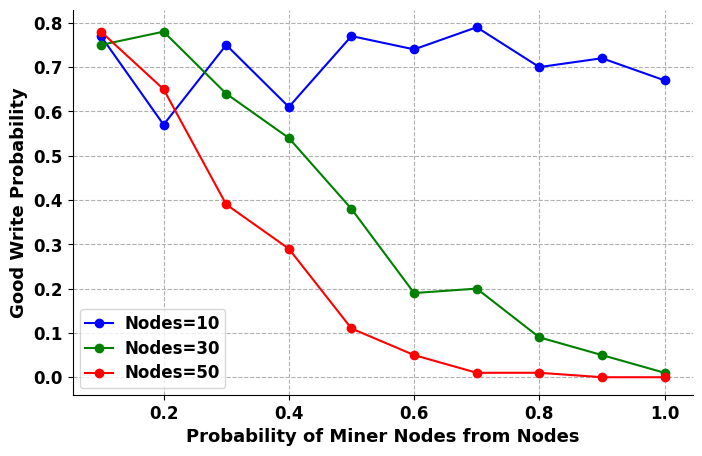

In [12]:
def draw_extra1_2():
    """全节点转共识节点概率对上链比例的影响."""
    MESSAGE_POOL_SIZE = 100
    NODES = [10, 30, 50]
    ROUND = 20
    P_N = np.arange(0.1, 1.01, 0.1)
    STRATEGY = 1
    W = 5
    P_WRITE_WRONG = 0.2
    P_VOTE_WRONG = 0.2

    res = {n: dict() for n in NODES}
    
    for n in NODES:
        print(f'Nodes {n}')
        for pn in P_N:
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=MESSAGE_POOL_SIZE, 
                                n=n, 
                                p_n=pn, 
                                rd=ROUND, 
                                strategy=STRATEGY, 
                                w=W, 
                                p_write_wrong=P_WRITE_WRONG,
                                p_vote_wrong=P_VOTE_WRONG,
                                verbose=False)
                write_stat = bc.start()
                tmp.append(write_stat['bc_good_prob'])
            res[n][pn] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'Nodes={k}') for k in NODES], xlabel='Probability of Miner Nodes from Nodes', ylabel='Good Write Probability', mode='show', save_name='Block Chain p_n & goodwriterate')

draw_extra1_2()

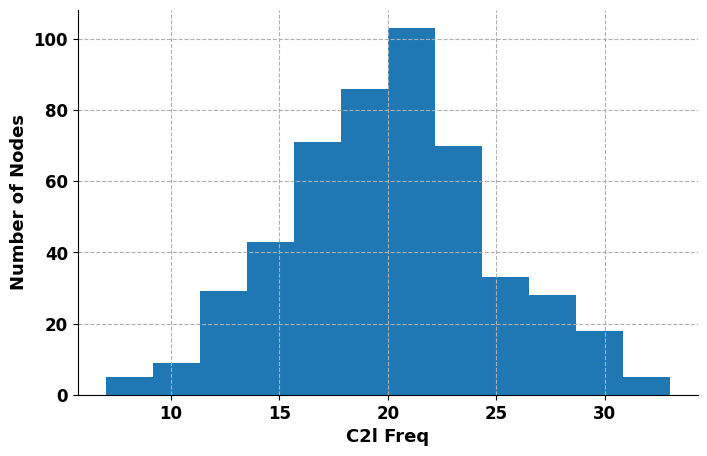

In [9]:
def draw_extra2():
    """共识节点转leader次数正态分布."""
    ROUND = 10000  # 共识轮数
    RATE_F2C = 0.2  # 全节点2共识节点概率
    POINT_AMOUNT = 500  # 全节点个数

    leader_count = [0 for _ in range(POINT_AMOUNT)]

    for i in range(ROUND):
        c_indexes = np.where(np.random.rand(POINT_AMOUNT) < RATE_F2C)[0]  # 成为共识节点的编号
        if len(c_indexes) > 0:
            leader = np.random.choice(c_indexes)
            leader_count[leader] += 1
    # print(leader_count)
    draw_hist(datas=leader_count, bins=12, xlabel='C2l Freq', ylabel='Number of Nodes')

draw_extra2()

P_VOTE_WRONG rate 0.2
P_VOTE_WRONG rate 0.3
P_VOTE_WRONG rate 0.4
P_VOTE_WRONG rate 0.5


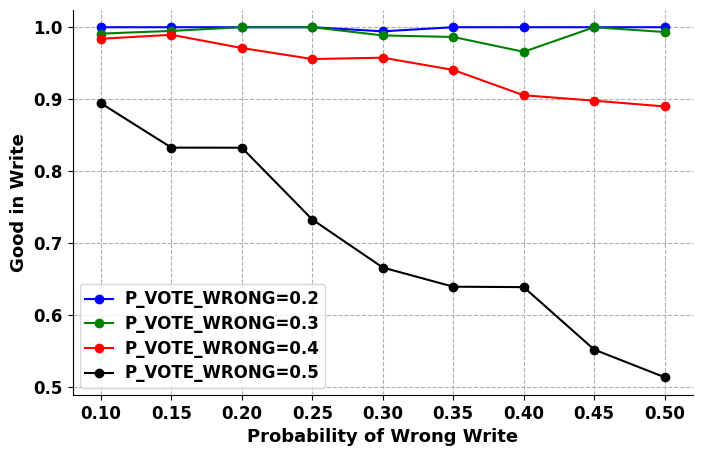

In [2]:
def draw_extra3_1():
    """写链错误率对好写链比例的影响."""
    MESSAGE_POOL_SIZE = 100
    NODES = 30
    ROUND = 50
    P_N = 0.1
    STRATEGY = 1
    W = 5
    P_WRITE_WRONG = np.arange(0.1, 0.5001, 0.05)
    P_VOTE_WRONG = [0.2, 0.3, 0.4, 0.5]

    res = {rate: dict() for rate in P_VOTE_WRONG}
    
    for pvw in P_VOTE_WRONG:
        print(f'P_VOTE_WRONG rate {pvw}')
        for pww in P_WRITE_WRONG:
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=MESSAGE_POOL_SIZE, 
                                n=NODES, 
                                p_n=P_N, 
                                rd=ROUND, 
                                strategy=STRATEGY, 
                                w=W, 
                                p_write_wrong=pww,
                                p_vote_wrong=pvw,
                                verbose=False)
                write_stat = bc.start()
                tmp.append(write_stat['bc_good_prob_in_append'])
            res[pvw][pww] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'P_VOTE_WRONG={k}') for k in P_VOTE_WRONG], xlabel='Probability of Wrong Write', ylabel='Good in Write', mode='show', save_name='Block Chain pww & writerate')

draw_extra3_1()


P_WRITE_WRONG rate 0.1
P_WRITE_WRONG rate 0.3
P_WRITE_WRONG rate 0.5


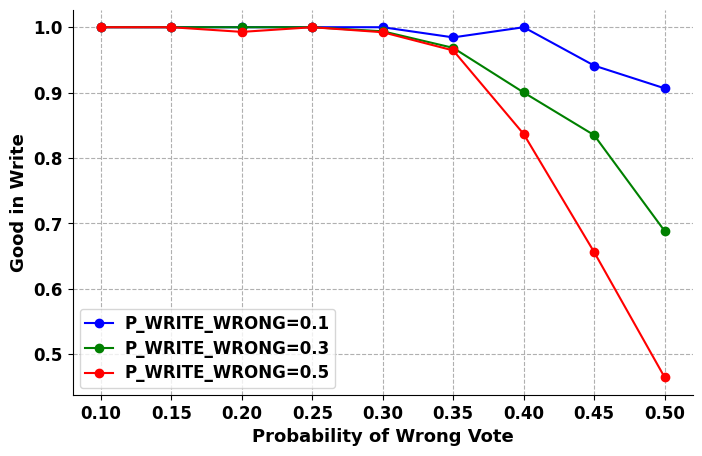

In [3]:
def draw_extra3_2():
    """投票错误率对好写链比例的影响."""
    MESSAGE_POOL_SIZE = 100
    NODES = 30
    ROUND = 50
    P_N = 0.1
    STRATEGY = 1
    W = 5
    P_WRITE_WRONG = [0.1, 0.3, 0.5]
    P_VOTE_WRONG = np.arange(0.1, 0.5001, 0.05)

    res = {rate: dict() for rate in P_WRITE_WRONG}
    
    for pww in P_WRITE_WRONG:
        print(f'P_WRITE_WRONG rate {pww}')
        for pvw in P_VOTE_WRONG:
            tmp = []
            for _ in range(5):
                bc = BlockChain(message_pool_size=MESSAGE_POOL_SIZE, 
                                n=NODES, 
                                p_n=P_N, 
                                rd=ROUND, 
                                strategy=STRATEGY, 
                                w=W, 
                                p_write_wrong=pww,
                                p_vote_wrong=pvw,
                                verbose=False)
                write_stat = bc.start()
                tmp.append(write_stat['bc_good_prob_in_append'])
            res[pww][pvw] = np.mean(tmp)

    # 绘制结果曲线
    draw_plt(datas=[(res[k].keys(), res[k].values(), f'P_WRITE_WRONG={k}') for k in P_WRITE_WRONG], xlabel='Probability of Wrong Vote', ylabel='Good in Write', mode='show', save_name='Block Chain pvw & writerate')

draw_extra3_2()


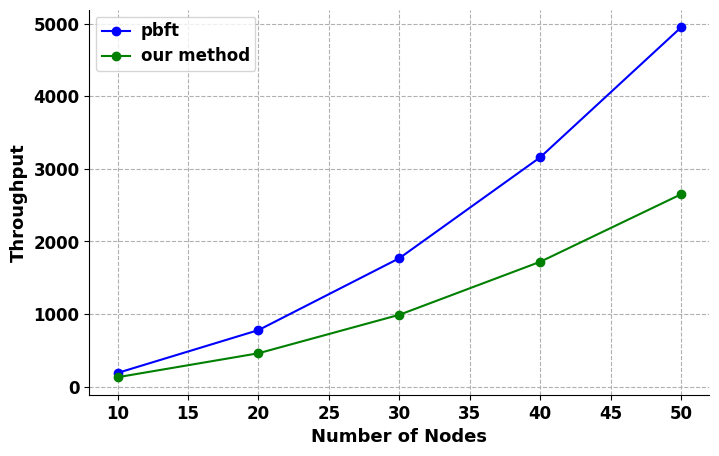

In [4]:
def draw_extra4():
    n = np.arange(10, 60, 10)
    datas=[(n, 2 * n ** 2 - n - 1, 'pbft'), 
           (n, n ** 2 + n * 3, 'our method')]

    draw_plt(datas=datas, xlabel='Number of Nodes', ylabel='Throughput', mode='show', save_name='node & throughput')

draw_extra4()